In [1]:
'''
主要的工作都在network3中完成，可查看network3文档，
这里只是调用模型去做实验
'''
import network3
from network3 import Network, ConvPoolLayer, FullyConnectedLayer, SoftmaxLayer 
# 加载数据
training_data, validation_data, test_data = network3.load_data_shared()

#初始化部分超参数
mini_batch_size = 10 
epochs = 10  
eta = 0.1     #学习率

Running with a CPU.  If this is not desired, then the modify network3.py to set
the GPU flag to True.


In [2]:
'''实验1
网络配置:
全连接层：   n_in=784, n_out=100
softmax层：  n_in=100, n_out=10
'''
net = Network([
    FullyConnectedLayer(n_in=784, n_out=100),
    SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)
net.SGD(training_data, epochs, mini_batch_size, eta, validation_data, test_data)

Training mini-batch number 0
Training mini-batch number 1000
Training mini-batch number 2000
Training mini-batch number 3000
Training mini-batch number 4000
Epoch 0: validation accuracy 92.41%
This is the best validation accuracy to date.
The corresponding test accuracy is 91.70%
Training mini-batch number 5000
Training mini-batch number 6000
Training mini-batch number 7000
Training mini-batch number 8000
Training mini-batch number 9000
Epoch 1: validation accuracy 94.59%
This is the best validation accuracy to date.
The corresponding test accuracy is 94.00%
Training mini-batch number 10000
Training mini-batch number 11000
Training mini-batch number 12000
Training mini-batch number 13000
Training mini-batch number 14000
Epoch 2: validation accuracy 95.57%
This is the best validation accuracy to date.
The corresponding test accuracy is 95.24%
Training mini-batch number 15000
Training mini-batch number 16000
Training mini-batch number 17000
Training mini-batch number 18000
Training mini-

观察结果可以发现，简单的两层神经网络经过10个epoch的训练后，在iteration 49999 取得最好的交叉验证准确率（97.39%），对应的测试准确率为97.15%
*** --- __

**下面开始实验2，神经网络结构如下：**

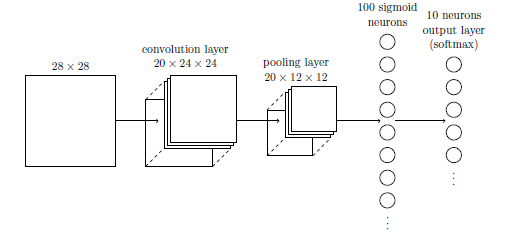
它是⼀种常⻅的**卷积**神经⽹络模式

In [3]:
'''实验2
网络配置:
卷积层：   
            图像大小：28*28
            卷积核：20个 5*5
            池化核大小：2*2            
全连接层：   n_in=20*12*12, n_out=100
softmax层：  n_in=100, n_out=10
'''
net = Network([
    ConvPoolLayer(image_shape=(mini_batch_size, 1, 28, 28),
                  filter_shape=(20, 1, 5, 5),
                  poolsize=(2, 2)),
    FullyConnectedLayer(n_in=20*12*12, n_out=100),
    SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)
net.SGD(training_data, epochs, mini_batch_size, eta, validation_data, test_data)

/home/albert/anaconda3/envs/py35/lib/python3.5/site-packages/theano/tensor/nnet/conv.py:98: UserWarning: theano.tensor.nnet.conv.conv2d is deprecated. Use theano.tensor.nnet.conv2d instead.
  warnings.warn("theano.tensor.nnet.conv.conv2d is deprecated."


Training mini-batch number 0
Training mini-batch number 1000
Training mini-batch number 2000
Training mini-batch number 3000
Training mini-batch number 4000
Epoch 0: validation accuracy 94.34%
This is the best validation accuracy to date.
The corresponding test accuracy is 93.74%
Training mini-batch number 5000
Training mini-batch number 6000
Training mini-batch number 7000
Training mini-batch number 8000
Training mini-batch number 9000
Epoch 1: validation accuracy 96.26%
This is the best validation accuracy to date.
The corresponding test accuracy is 96.05%
Training mini-batch number 10000
Training mini-batch number 11000
Training mini-batch number 12000
Training mini-batch number 13000
Training mini-batch number 14000
Epoch 2: validation accuracy 97.11%
This is the best validation accuracy to date.
The corresponding test accuracy is 97.07%
Training mini-batch number 15000
Training mini-batch number 16000
Training mini-batch number 17000
Training mini-batch number 18000
Training mini-

相比单纯的全链接网络，单层的卷积神经网络获得了更高的交叉验证和测试准确率（1个百分点的提升），但付出的代价也十分明显，相比于实验1，能感受到训练速度明显变慢。

In [4]:
'''
实验3
网络配置:
卷积层1：   
            图像大小：   1个  28*28
            卷积核：     20个 5*5
            池化核大小：      2*2   
卷积层2：   
            图像大小：   20个  12*12
            卷积核：     40个 5*5
            池化核大小：      2*2   
全连接层：   n_in=40*4*4, n_out=100
softmax层：  n_in=100, n_out=10

'''
net = Network([
    ConvPoolLayer(image_shape=(mini_batch_size, 1, 28, 28),
                  filter_shape=(20, 1, 5, 5),
                  poolsize=(2, 2)),
    ConvPoolLayer(image_shape=(mini_batch_size, 20, 12, 12),
                  filter_shape=(40, 20, 5, 5),
                  poolsize=(2, 2)),
    FullyConnectedLayer(n_in=40*4*4, n_out=100),
    SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)
net.SGD(training_data, epochs, mini_batch_size, eta, validation_data, test_data)

/home/albert/anaconda3/envs/py35/lib/python3.5/site-packages/theano/tensor/nnet/conv.py:98: UserWarning: theano.tensor.nnet.conv.conv2d is deprecated. Use theano.tensor.nnet.conv2d instead.
  warnings.warn("theano.tensor.nnet.conv.conv2d is deprecated."


Training mini-batch number 0
Training mini-batch number 1000
Training mini-batch number 2000
Training mini-batch number 3000
Training mini-batch number 4000
Epoch 0: validation accuracy 94.52%
This is the best validation accuracy to date.
The corresponding test accuracy is 94.26%
Training mini-batch number 5000
Training mini-batch number 6000
Training mini-batch number 7000
Training mini-batch number 8000
Training mini-batch number 9000
Epoch 1: validation accuracy 97.00%
This is the best validation accuracy to date.
The corresponding test accuracy is 96.68%
Training mini-batch number 10000
Training mini-batch number 11000
Training mini-batch number 12000
Training mini-batch number 13000
Training mini-batch number 14000
Epoch 2: validation accuracy 97.72%
This is the best validation accuracy to date.
The corresponding test accuracy is 97.50%
Training mini-batch number 15000
Training mini-batch number 16000
Training mini-batch number 17000
Training mini-batch number 18000
Training mini-

可以看出与实验2相比，在10个epochs下的性能提升不是很明显，甚至基本持平，不过其思想值得深究，那就是特征的再提取，这可以让网络学习到更加复杂的特征

In [5]:
'''
实验4，运用RELU和正侧化技术进一步提升性能
'''
from network3 import ReLU
net = Network([
    ConvPoolLayer(image_shape=(mini_batch_size, 1, 28, 28),
                  filter_shape=(20, 1, 5, 5),
                  poolsize=(2, 2),
                  activation_fn=ReLU),
    ConvPoolLayer(image_shape=(mini_batch_size, 20, 12, 12),
                  filter_shape=(40, 20, 5, 5),
                  poolsize=(2, 2),
                  activation_fn=ReLU),
    FullyConnectedLayer(n_in=40*4*4, n_out=100, activation_fn=ReLU),
    SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)
net.SGD(training_data, 10, mini_batch_size, 0.03, validation_data, test_data, lmbda=0.1)

/home/albert/anaconda3/envs/py35/lib/python3.5/site-packages/theano/tensor/nnet/conv.py:98: UserWarning: theano.tensor.nnet.conv.conv2d is deprecated. Use theano.tensor.nnet.conv2d instead.
  warnings.warn("theano.tensor.nnet.conv.conv2d is deprecated."


Training mini-batch number 0
Training mini-batch number 1000
Training mini-batch number 2000
Training mini-batch number 3000
Training mini-batch number 4000
Epoch 0: validation accuracy 97.03%
This is the best validation accuracy to date.
The corresponding test accuracy is 96.64%
Training mini-batch number 5000
Training mini-batch number 6000
Training mini-batch number 7000
Training mini-batch number 8000
Training mini-batch number 9000
Epoch 1: validation accuracy 97.89%
This is the best validation accuracy to date.
The corresponding test accuracy is 97.91%
Training mini-batch number 10000
Training mini-batch number 11000
Training mini-batch number 12000
Training mini-batch number 13000
Training mini-batch number 14000
Epoch 2: validation accuracy 98.24%
This is the best validation accuracy to date.
The corresponding test accuracy is 98.23%
Training mini-batch number 15000
Training mini-batch number 16000
Training mini-batch number 17000
Training mini-batch number 18000
Training mini-

在这个实验中，网络的训练速度与实验3基本相同，但准确率得到了进一步的提升，这是由正侧化以及改变激活函数等带来的提升

*** --- __
**实验总结：**
经过本次实验，我收益良多。最明显的一条是，理论学习与实际模型的搭建还是有一定的距离，这次实验用到的理论知识并不是十分难懂，像是课程上反复强调的**梯度下降**以及**正侧化**等。实验的难点在于本次实验是基于**"theano"**这个第三方库，一开始在window系统下尝试安装这个库，辗转反侧做了许多工作，最后终于能够成功**"import"**,但在实验过程中，做到第二个实验，就莫名其妙的报错，经过一番努力仍未找到解决方案。经过失败后，索性改用Ubuntu系统，一步一步完成环境搭建，最后成功跑通。